# Data Analysis
This notebook provides basic functionality to analysis the given data. Data can be realized using multiple ways such as - data description in a data frame to understand the data organization, plots to understand statistical properties, principal component analysis to understand dominant features in the data. Here, we provide these functionality with minimal input from user. 


### Table of Content

  * [Data Description](#Data-Description)
  * [Import Data](#Import-Data)
  * [Data Frame](#Data-Frame)
  * [Statistics](#Statistics)
  * [Principal Component Analysis](#Principal-Component-Analysis)
  * [Feature Engineering](#Feature-Engineering)

### Data Description

NASA C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) data set (Turbofan Engine Degradation Simulation Data Set) is a widely used benchmark data. C-MAPSS data includes sensor data with different number of operating conditions and fault conditions [1].

|      Data Set        |  FD001 | FD002 | FD003 | FD004|
|----------------------|--------|-------|-------|------|
|  Train Trajectories  |  100   |  260  |  100  | 249  |
|   Test Trajectories  |  100   |  259  |  100  |  248 |
| Operating Conditions |    1   |   6   |   1   |   6  |
|    Fault Conditions  |    1   |   1   |   2   |   2  |

The data has 4 sub-data sets with different number of operating conditions and fault conditions and each sub-data set is further divided into training and test subsets, as shown in table above. We use dataset FD002 for our purpose. Each row in the data is a snapshot of data taken during a single operating time cycle, which includes 26 columns: 
 * 1st column represents engine ID, 
 * 2nd column represents the current operational cycle number, 
 * 3-5 columns are the three operational settings that have a substantial effect on engine performance, 
 * 6-26 columns represent the 21 sensor values. More information about the 21 sensors can be found in [2]. 

The engine is operating normally at the start of each time series, and develops a fault at some point in time which is unknown. In the training set, the fault grows in magnitude until a system failure. In the test set, data is provided up to some time prior to system failure. The goal is to estimate the number of remaining operational cycles before failure on the test data. 

[1] S. Zheng, K. Ristovski, A. Farahat and C. Gupta, "Long Short-Term Memory Network for Remaining Useful Life estimation," 2017 IEEE International Conference on Prognostics and Health Management (ICPHM), Dallas, TX, 2017, pp. 88-95.

[2] E. Ramasso and A. Saxena, “Performance benchmarking and analysis of prognostic methods for cmapss datasets.” International Journal of Prognostics and Health Management, vol. 5, no. 2, pp. 1–15, 2014.

### Import Data

'Turbofan Engine Degradation Simulation Data Set' can be downloaded from here: 
https://ti.arc.nasa.gov/tech/dash/pcoe/prognostic-data-repository/

In [2]:
# Import C-MAPSS Dataset FD002 train and test and records of RUL
# provide file path to this function  ---
from SAP.data_import import get_C_MAPSS_Data
data_training_FD2, data_testing_FD2, data_testing_RUL_FD2 = get_C_MAPSS_Data(path = 'Data', dataset = 'FD002')

[Info] Training Data Loading...
[Info] Testing Data Loading...
[Info] Loading records of RUL on this testing data...


### Data Frame

In [3]:
from SAP.utils import dataframe
# training dataframe
dataframe(df = data_training_FD2)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (model.py, line 68)

### Statistics

Histogram Plots of every column variable:


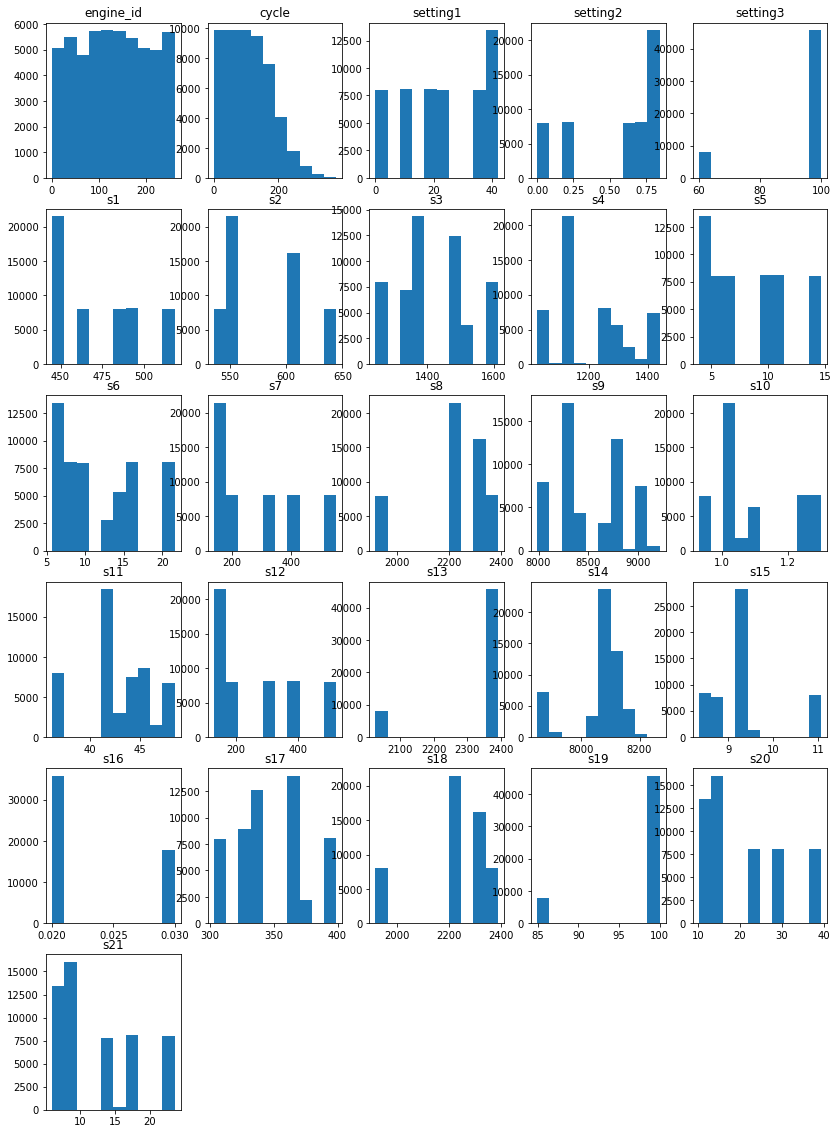

In [3]:
from SAP.utils import stats_histogram
%matplotlib inline
# training data statistics
stats_histogram(df = data_training_FD2,
      c = 5)

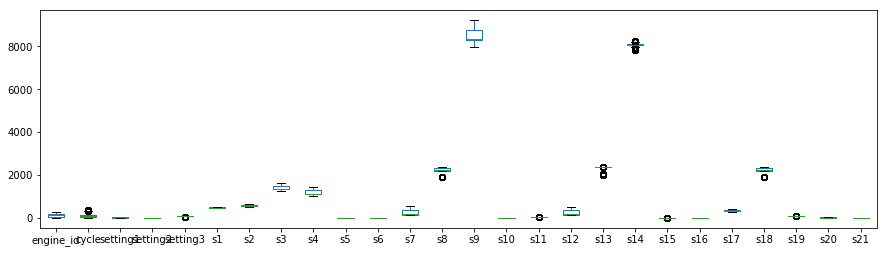

In [4]:
from SAP.utils import stats_boxplot
%matplotlib inline
# training data statistics
stats_boxplot(df = data_training_FD2)

We observe that sensors si (i = 1 to 21) values are distributed across a wide range. For modeling, it would be advised to scale the range and level to a common reference using normalization or standardization.

### Principal Component Analysis

[Info] Training Data Loading...
[Info] Testing Data Loading...
[Info] Loading records of RUL on this testing data...
PC coverage: [ 0.52,  0.48,  0.00,  ]


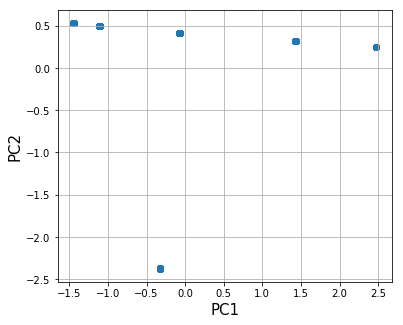

In [5]:
from SAP.data_import import get_C_MAPSS_Data
data_training_FD2, data_testing_FD2, data_testing_RUL_FD2 = get_C_MAPSS_Data(path = 'Data', dataset = 'FD002')

from SAP.utils import pca
%matplotlib inline
pca(df = data_training_FD2,
    cols = ['setting1','setting2','setting3']
    )

We take three settings as operational conditions and observe that these settings are clustered in six groups in their principal component space. 